<a href="https://colab.research.google.com/github/max3700/A1_task1_timeseries/blob/master/A1_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pandas
import matplotlib.pyplot as plt

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Task_1_2.xlsx to Task_1_2.xlsx


In [ ]:
df = pd.read_excel('Task_1_2.xlsx', sheet_name=0)
df.dtypes

Date        object
series1    float64
dtype: object

In [ ]:
from datetime import datetime
con=df['Date']
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
#check datatype of index
df.index

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2019-06-21', '2019-06-22', '2019-06-23', '2019-06-24',
               '2019-06-25', '2019-06-26', '2019-06-27', '2019-06-28',
               '2019-06-29', '2019-06-30'],
              dtype='datetime64[ns]', name='Date', length=1642, freq=None)

In [ ]:
ts = df['series1']
ts.head()

Date
2015-01-01    1006.699649
2015-01-02    3197.751826
2015-01-03    3217.491035
2015-01-04    2151.573759
2015-01-05    4243.929892
Name: series1, dtype: float64

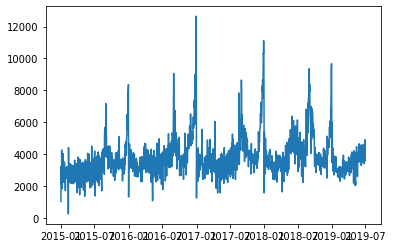

In [ ]:
plt.plot(ts)

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

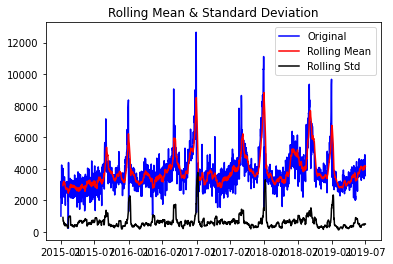

Results of Dickey-Fuller Test:
Test Statistic                   -5.496714
p-value                           0.000002
#Lags Used                       21.000000
Number of Observations Used    1620.000000
Critical Value (1%)              -3.434393
Critical Value (5%)              -2.863326
Critical Value (10%)             -2.567721
dtype: float64


In [ ]:
test_stationarity(ts)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
X = df.values
size = int(len(X) * 0.7)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [ ]:
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=3829.517211, expected=6395.503652
predicted=5542.728604, expected=7027.158334
predicted=6068.978717, expected=8270.728488
predicted=7182.651295, expected=7935.161938
predicted=7164.918721, expected=8665.512664
predicted=7512.218674, expected=8566.816620
predicted=8122.265045, expected=7500.899345
predicted=7531.826356, expected=8527.338203
predicted=8506.573051, expected=10323.606204
predicted=9450.152667, expected=10284.127786
predicted=9642.552609, expected=11113.174556
predicted=10493.134884, expected=10422.302248
predicted=9922.440903, expected=7323.246466
predicted=8086.730133, expected=1559.397495
predicted=4606.297613, expected=5388.804003
predicted=6644.938963, expected=4954.541409
predicted=5842.083663, expected=4638.714069
predicted=5560.850097, expected=4382.104354
predicted=5396.840695, expected=4480.800398
predicted=3836.502576, expected=2743.750024
predicted=3514.518879, expected=4974.280618
predicted=4848.014629, expected=3691.232046
predicted=3861.200257, expe

In [ ]:
error = mean_squared_error(test, predictions[0:559])
print('Test MSE: %.3f' % error)

Test MSE: 554509.683


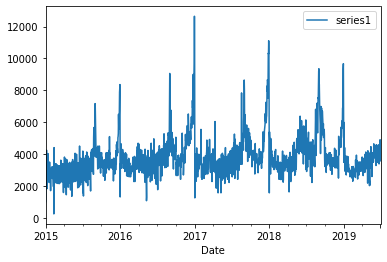

In [ ]:
#df.set_index('Date', inplace=True)
#df.index = pd.to_datetime(df.index)
#df.plot()

РЕсемпл по неделям

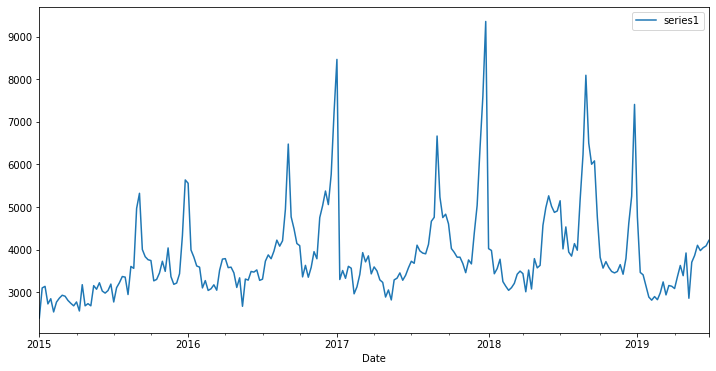

In [ ]:
dfr = df.resample('W').mean()
dfr.plot(figsize=(12,6))

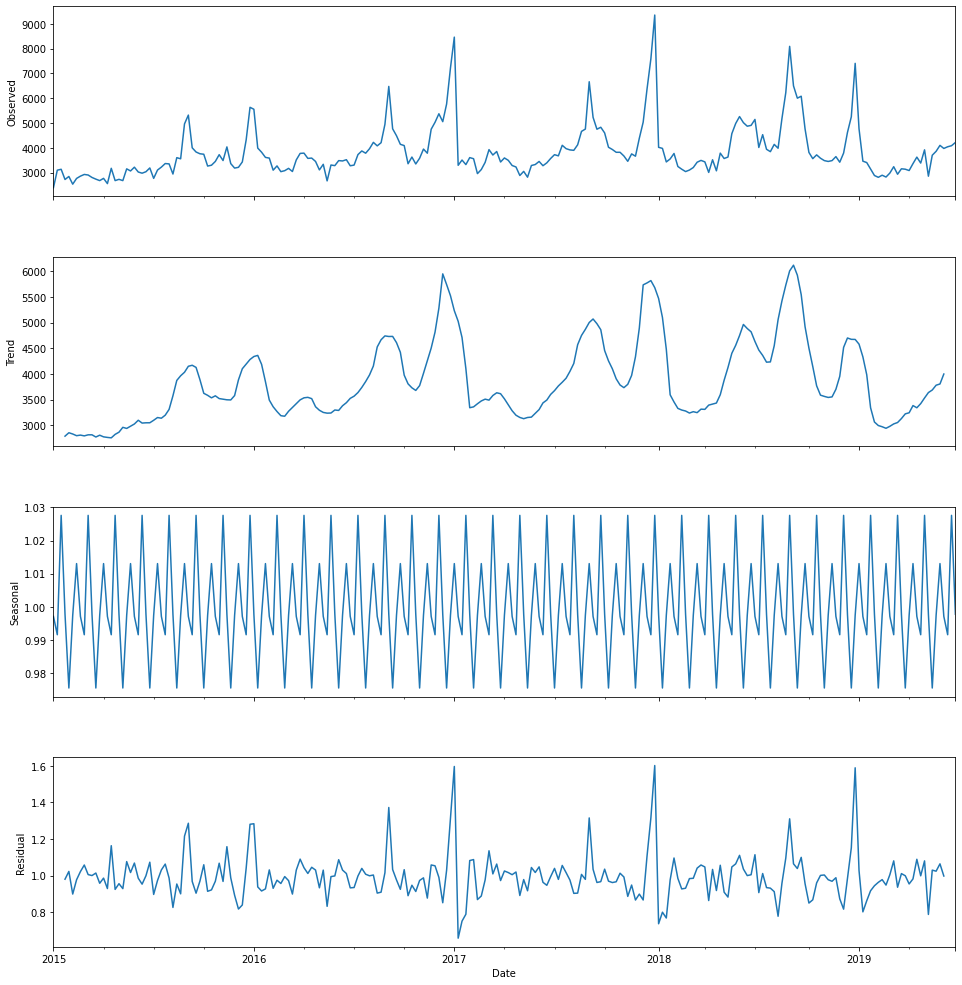

In [ ]:
result = seasonal_decompose(dfr, model='multiplicative',freq=7)
fig = result.plot()
fig.set_size_inches(15,16)
plt.show()

,series1
count,1642.000000
mean,3854.975154
std,1237.337605
min,236.870506
25%,3138.534200
50%,3632.014420
75%,4258.734299
max,12652.832842


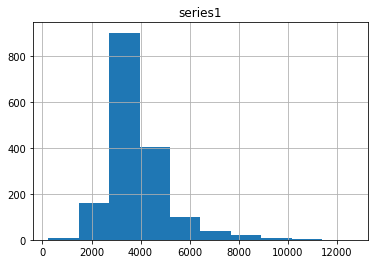

In [ ]:
itog = df.describe()
df.hist()
itog